#### Creating the dataset
Creating a dataset of two classes(sinusoid and gaussian with different parameters and different lengths). The gaussian dataset has the same kernel in order to keep parity. The sinusoids are generated with different frequencies (Add different phases) as well. 

In [1]:
import numpy as np
import timesynth as ts
import matplotlib.pyplot as plt
%matplotlib inline

Using a balanced dataset with 500 samples for each class

In [2]:
def generate_sin_data(stop_time, amplitude, freq ,num_points, keep_percentage, noise):
    time_sampler = ts.TimeSampler(stop_time=stop_time)
    irregular_time_samples = time_sampler.sample_irregular_time(num_points=num_points,
                                                                keep_percentage=keep_percentage)
    sinusoidal_object = ts.signals.Sinusoidal(frequency=freq, amplitude=amplitude)
    white_noise = ts.noise.GaussianNoise(std=noise)
    timeseries = ts.TimeSeries(sinusoidal_object, noise_generator=white_noise)
    samples, signals, errors = timeseries.sample(irregular_time_samples)
    # Reshaping to concatenate
    samples = np.reshape(samples, (len(samples), 1))
    irregular_time_samples = np.reshape(irregular_time_samples, (len(irregular_time_samples), 1))
    return np.concatenate((samples, irregular_time_samples), axis=1)

In [3]:
#Creating the data for sinusoids(Training Set)
n_files = 500
stop_time_values = np.random.uniform(low=2., high=50., size = n_files)
amplitude_values = np.random.uniform(low=0.5, high=5., size= n_files)
freq_values = np.random.uniform(low=0.2, high=2., size= n_files)
num_points_values = np.random.randint(1000, 2000, size= n_files)
keep_percentage_values = np.random.choice(np.linspace(25, 75, num=11), size= n_files)
noise_values = np.random.uniform(low=0, high=0.5, size= n_files)

In [4]:
save_dir = '../data/classify/train/'
for i in range(n_files):
    out = generate_sin_data(stop_time_values[i],
                            amplitude_values[i],
                            freq_values[i],
                            num_points_values[i],
                            keep_percentage_values[i],
                            noise_values[i])
    #Saving to the directory as a csv
    np.savetxt(save_dir+str(i+1)+'.csv', out, delimiter=',')

In [9]:
#Loading a file
save_dir = '../data/classify/train/'
out = np.loadtxt(save_dir + '400.csv', delimiter=',')

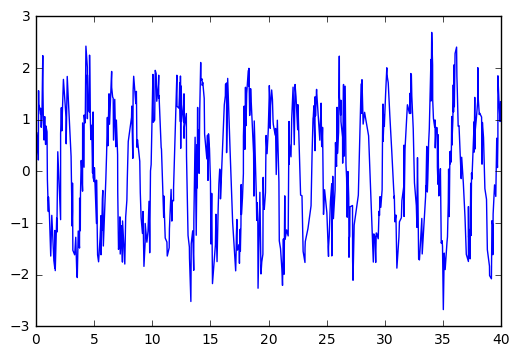

In [10]:
plt.plot(out[:,1], out[:, 0])

Generating gaussian curves

In [25]:
def generate_gp_data(stop_time, nu, lengthscale ,num_points, keep_percentage):
    time_sampler = ts.TimeSampler(stop_time=stop_time)
    irregular_time_samples = time_sampler.sample_irregular_time(num_points=num_points,
                                                                keep_percentage=keep_percentage)
    gp_object = ts.signals.GaussianProcess(nu=nu, lengthscale=lengthscale, kernel='Matern')
    timeseries = ts.TimeSeries(gp_object)
    samples, signals, errors = timeseries.sample(irregular_time_samples)
    # Reshaping to concatenate
    samples = np.reshape(samples, (len(samples), 1))
    irregular_time_samples = np.reshape(irregular_time_samples, (len(irregular_time_samples), 1))
    return np.concatenate((samples, irregular_time_samples), axis=1)

In [26]:
#Creating the data for gaussians(Training Set)
n_files = 500
stop_time_values = np.random.uniform(low=2., high=50., size = n_files)
lengthscale_values = np.random.uniform(low=1, high=5, size= n_files)
nu_values = np.random.uniform(low=0.1, high=2., size= n_files)
num_points_values = np.random.randint(1000, 2000, size= n_files)
keep_percentage_values = np.random.choice(np.linspace(25, 75, num=11), size= n_files)

In [27]:
save_dir = '../data/classify/train/'
for i in range(n_files):
    out = generate_gp_data(stop_time_values[i],
                            nu_values[i],
                            lengthscale_values[i],
                            num_points_values[i],
                            keep_percentage_values[i])
    #Saving to the directory as a csv
    np.savetxt(save_dir+str(i+1+500)+'.csv', out, delimiter=',')

In [ ]:
#Loading a file
save_dir = '../data/classify/train/gauss/'
out = np.loadtxt(save_dir + '150.csv', delimiter=',')

In [ ]:
plt.plot(out[:,1], out[:, 0])